# Common ACS Variable Annotation
<br>

![acs_variable](images/acs_variable.png)

# Data Products
<br>

![data_products](images/dataproducts.png)

<br>

Detailed Tables - Designed for advanced data users or those who want access to the most comprehensive ACS tables.  All other ACS products are built from these tables and are the only available tables at the block group level.<br><br>

Data profiles - Generally a good place to start with ACS as they contain the most frequently requested social, economic, housing and demographic data.  Each subject area is a separate profile.  The data profiles summarize the data for a single geographic area to cover estimates and percentages on the most basic ACS topics.<br><br>

Comparison profiles - Are similar to data profiles except they compare this information over time.  Five year comparison profiles show data side by side from two different years, indicating where there's a statisticly significant difference between the two sets of estimates.<br><br>

Selected population profiles - Provide detailed race and ethnicity data.  Summary tables separately over 100 detailed ethnic, racial and tribal groups.  Only available for 1 year estimates.  Use pop group predicate.<br><br>

Subject Tables - For data users interested in a particular topic, such as employment, education and income, may wish to start with the subject tables.  Provide pretabulated estimates and percentages for a wide variety of topics.  Often available by age, sex or race and ethnicity.

# example query  
median household income with margin of error for all states, 2014 - 2018 ACS 5-year estimates <br>
## https://api.census.gov/data/2018/acs/acs5/?get=NAME,B19013_001E,B19013_001M&for=state:*

# Manual URL retrieval

In [1]:
from manual_url_fetch_census import manual_url_fetch_census, json_to_csv
import os

# manual url retrieval
url = "https://api.census.gov/data/2018/acs/acs5/subject?get=NAME,group(S1501)&for=us:*&key=dfda23551f004bbb2f7014e2335573bd023c6cf8"

# Fetch the data
json_data = manual_url_fetch_census(url)
# Check if data was fetched successfully
if json_data:
    # Convert JSON data to CSV
    output_file = "census_data.csv"
    json_to_csv(json_data, output_file)
else:
    print("Failed to fetch data.")
# Check if the file was created successfully
if os.path.exists(output_file):
    print(f"File {output_file} created successfully.")

Request successful!

Data successfully written to census_data.csv
File census_data.csv created successfully.


In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(output_file)
# Display the first few rows of the DataFrame
df.head().T


,0
NAME,United States
GEO_ID,0100000US
NAME.1,United States
S1501_C01_001E,30903719
S1501_C01_001EA,NaN
...,...
S1501_C06_064E,-888888888.0
S1501_C06_064EA,(X)
S1501_C06_064M,-888888888.0
S1501_C06_064MA,(X)


## Reusable Function for Common API requests

In [3]:
# import python modules for reusable api queries
from ingest_census import fetch_census_data, transform_json_to_csv
import os


In [4]:
# set constants then run function

year = '2023' 

dataset = 'acs/acs5' 

variables = ["NAME","B19013_001E"]  # median household income

#geo = "&for=us:*"
# nyc_counties "005", "047", "061", "081", "085"
geo = "&for=county:005,047,061,081,085&in=state:36"  # all counties in NY state (36)

api_key = os.environ["api_key"]

# fetch the data
data = fetch_census_data(year, dataset, variables, geo, api_key)

print(data)

Sending request to: https://api.census.gov/data/2023/acs/acs5?get=NAME,B19013_001E&for=county:005,047,061,081,085&in=state:36&key=dfda23551f004bbb2f7014e2335573bd023c6cf8
Request successful!

[['NAME', 'B19013_001E', 'state', 'county'], ['Bronx County, New York', '49036', '36', '005'], ['Kings County, New York', '78548', '36', '047'], ['New York County, New York', '104553', '36', '061'], ['Queens County, New York', '84961', '36', '081'], ['Richmond County, New York', '98290', '36', '085']]


In [5]:
# transform the data to CSV
output_file = "census_data.csv"
transform_json_to_csv(data, output_file)


Data successfully saved to census_data.csv


In [6]:
import pandas as pd
# Read the CSV file
df = pd.read_csv(output_file)

df

,NAME,B19013_001E,state,county
0,"Bronx County, New York",49036,36,5
1,"Kings County, New York",78548,36,47
2,"New York County, New York",104553,36,61
3,"Queens County, New York",84961,36,81
4,"Richmond County, New York",98290,36,85


/var/folders/f1/dmgdbt5j5nb5ht5_vfxmr8gm0000gn/T/ipykernel_36447/3001380831.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='median household income', y='NAME', data=df, palette="viridis")


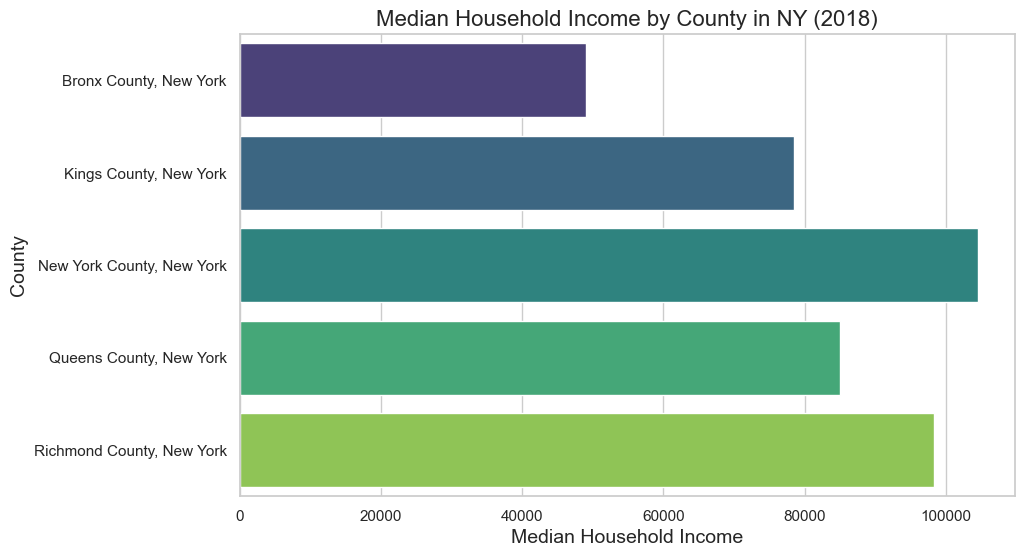

In [7]:
# rename column 1 'median household income'
df.rename(columns={df.columns[1]: 'median household income'}, inplace=True)

# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

# set the style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# create a bar plot
sns.barplot(x='median household income', y='NAME', data=df, palette="viridis")

# set the title and labels
plt.title('Median Household Income by County in NY (2018)', fontsize=16)
plt.xlabel('Median Household Income', fontsize=14)
plt.ylabel('County', fontsize=14)
plt.show()

## Use Case

1.  ACS 5 Year data - 5 year data allows to drill down to granular levels of geography<br><br>
2.  Once we are on the 5 year page, we can find documentation for detailed 
tables by using the discovery tool<br><br>
Shows all options for 2014 - 2018 ACS 5 year<br><br>
3.  The two most useful columns to start with are `Variable List` and `Examples`
<br><br>
4.  Go to the examples page: here we can see a sample query for each level of geography available for that year and dataset<br><br>

5.  Go to variables page and use text search to find topics like `median household income`<br><br>
6. Table ID = B19013A_001`E` <br>
Notice characte after table id, these are race iterated tables<br>
If you're looking for median household income for a race category, this is where you can look<br>

